# Lesson 10 Final Hands-On Jessenia Lorenzo

## Import Packages

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import scipy
from scipy import stats
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from statsmodels.stats.multicomp import MultiComparison
from statsmodels.stats.proportion import proportions_ztest
from statsmodels.stats.proportion import proportions_chisquare

## Scenario 1 (One proportion Z-test)


In [ ]:
count = 28
nobs = 94
value = .16
stat, pval = proportions_ztest(count, nobs, value)
print(stat, pval)

2.9229268377264077 0.0034675798365736213


In [ ]:
##### z-score is 2.92 and p is 0.003. The null hypothesis is TRUE. There is a difference between possible number of fraudulent claimaints in workman's compensation claims at this company as opposed to number of hypothesize level of fraud since the p-value is less than 0.05 (<0.05)

## Scenario 2 (Independent Chi-Sqaure)

In [ ]:
df2 = pd.read_csv("antiseptics.csv")
df2.rename(columns={'Antiseptic Type ': "AS", "Number of applications": "Count"}, inplace=True)

In [ ]:
df2_pivot = pd.pivot_table(df2,index='AS',columns='Clinic',values="Count")
df2_pivot

Clinic   1    2    3
AS                  
A       22   38   84
B       71  112  298
C        8   14   37
D       49   69  182

In [ ]:
stats.chi2_contingency(df2_pivot)

(1.225920250023835,
 0.9755850789571424,
 6,
 array([[ 21.95121951,  34.09756098,  87.95121951],
        [ 73.32317073, 113.8953252 , 293.78150407],
        [  8.99390244,  13.97052846,  36.03556911],
        [ 45.73170732,  71.03658537, 183.23170732]]))

##### We're accepting the null hypothesis. Assumptions are met for chi-square. 


## Scenario 3 (One-way ANOVA)

In [ ]:
df3 = pd.read_csv("savings.csv")
df3.head()

Group A   Group B   Group C   Group D
0  21383.06  17077.54  13636.38  14582.73
1  19729.92  17258.06   5156.36  12880.28
2  24071.53  20652.91   4446.92  16412.72
3  19056.28  20845.06   4892.59  14020.00
4  19147.18  22296.64  14099.38  16467.70

In [ ]:
df3_expanded=pd.melt(df3,var_name='Group', value_name='$')
df3_expanded.head()

Group         $
0  Group A  21383.06
1  Group A  19729.92
2  Group A  24071.53
3  Group A  19056.28
4  Group A  19147.18

In [ ]:
df3_expanded = df3_expanded.replace(df3.columns, [0,1,2,3])
df3_expanded.head()

Group         $
0      0  21383.06
1      0  19729.92
2      0  24071.53
3      0  19056.28
4      0  19147.18

### Plot Dependent Variable

C:\Users\lzela\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

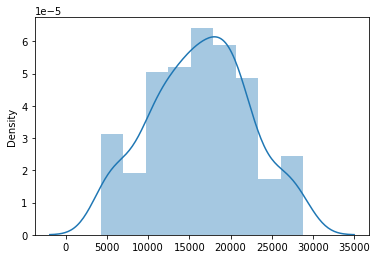

In [ ]:
sns.distplot(df3.values[~np.isnan(df3.values)], kde=True)

##### Test for homogeneity variance using both barlett and fligner

In [ ]:
scipy.stats.bartlett(df3_expanded['Group'], df3_expanded['$'])

BartlettResult(statistic=3639.1753663764925, pvalue=0.0)

In [ ]:
# Barlett Results = statistic: 3639.1 and p-value: 0.0. Significant p-value since less than 0.05. We have violated the assumption of homogeneity of number of variance. We reject the null hypothesis and there IS a significant difference.

In [ ]:
scipy.stats.fligner(df3_expanded['$'], df3_expanded['Group'])

FlignerResult(statistic=292.8661128532466, pvalue=1.1805018303420083e-65)

In [ ]:
# Fligner Results = statistic: 292.8 and p-value 1.1. The p-value is >0.05 Therefore we have violated the assumption of homogeneity of number of variance. There means there is no significant difference. We accept the null hypothesis.

#### Drop NA's

In [ ]:
df3_expanded.dropna(inplace=True)

### Test for homogeneity variance using both barlett and fligner

In [ ]:
stats.f_oneway(df3_expanded['$'][df3_expanded['Group']==0],
               df3_expanded['$'][df3_expanded['Group']==1],
               df3_expanded['$'][df3_expanded['Group']==2],
               df3_expanded['$'][df3_expanded['Group']==3])

F_onewayResult(statistic=203.25514198903812, pvalue=1.9933595578005075e-61)

#### F_onewayresult (statistic: 203.2 and p-value: 1.9). Therefore since p-value is more than >0.05, we accept the null hypothesis and there is no difference in between account average per demo group.

##### This compares the dependent variables with all levels of the independent variable.
##### The P value is greater than 0.5 so we're accepting the null hypothesis and the difference isn't significant.

## Scenario 4 (One-way ANOVA)

In [ ]:
count = np.array([374, 171])
nobs = np.array([129+374, 171+74])
stat, pval = proportions_ztest(count, nobs)
print(stat, pval)

1.3156546893290748 0.18828996870412507


##### The p-value is >0.05. Therefore, the difference isn't significant. We accept the null hypothesis.

##### There is a difference to the different groups with school age children and without school age children